In [101]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Loading the Data

In [102]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
df_meta = pd.read_csv(r'c:\Users\Admin\Downloads\csv\meta.csv')
df_meta.head()

,SeriesInstanceUID,StudyInstanceUID,Modality,SeriesDescription,BodyPartExamined,SeriesNumber,Collection,Visibility,ImageCount
0,1.3.6.1.4.1.9590.100.1.2.117041576511324414842...,1.3.6.1.4.1.9590.100.1.2.229361142710768138411...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2
1,1.3.6.1.4.1.9590.100.1.2.438738396107617880132...,1.3.6.1.4.1.9590.100.1.2.195593486612988388325...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2
2,1.3.6.1.4.1.9590.100.1.2.767416741131676463382...,1.3.6.1.4.1.9590.100.1.2.257901172612530623323...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2
3,1.3.6.1.4.1.9590.100.1.2.296931352612305599800...,1.3.6.1.4.1.9590.100.1.2.109468616710242115222...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2
4,1.3.6.1.4.1.9590.100.1.2.436657670120353100077...,1.3.6.1.4.1.9590.100.1.2.380627129513562450304...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2


In [104]:
# load dicom info file
df_dicom = pd.read_csv(r'c:\Users\Admin\Downloads\csv\dicom_info.csv')
#df_dicom.head()

In [105]:
# check image types in dataset
df_dicom.SeriesDescription.unique()

array(['cropped images', 'full mammogram images', nan, 'ROI mask images'],
      dtype=object)

In [106]:
# check image path in dataset
# cropped images
cropped_images = df_dicom[df_dicom.SeriesDescription=='cropped images'].image_path
#cropped_images.head(5)

In [107]:
#full mammogram images
full_mammo = df_dicom[df_dicom.SeriesDescription=='full mammogram images'].image_path
#full_mammo.head(5)

In [108]:
# ROI images
roi_img = df_dicom[df_dicom.SeriesDescription=='ROI mask images'].image_path
#roi_img.head(5)

In [109]:
# set correct image path for image types
imdir = 'c:/Users/Admin/Downloads/csv/jpeg'

In [110]:
# change directory path of images
cropped_images = cropped_images.replace('CBIS-DDSM/jpeg', imdir, regex=True)
full_mammo = full_mammo.replace('CBIS-DDSM/jpeg', imdir, regex=True)
roi_img = roi_img.replace('CBIS-DDSM/jpeg', imdir, regex=True)
# view new paths
print('Cropped Images paths:\n')
print(cropped_images.iloc[0])
print('Full mammo Images paths:\n')
print(full_mammo.iloc[0])
print('ROI Mask Images paths:\n')
print(roi_img.iloc[0])

Cropped Images paths:

c:/Users/Admin/Downloads/csv/jpeg/1.3.6.1.4.1.9590.100.1.2.129308726812851964007517874181459556304/1-172.jpg
Full mammo Images paths:

c:/Users/Admin/Downloads/csv/jpeg/1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849/1-249.jpg
ROI Mask Images paths:

c:/Users/Admin/Downloads/csv/jpeg/1.3.6.1.4.1.9590.100.1.2.153339052913121382622526066491844156138/2-270.jpg


In [111]:
# organize image paths
full_mammo_dict = dict()
cropped_images_dict = dict()
roi_img_dict = dict()
for dicom in full_mammo:
    key = dicom.split("/")[-2]
    full_mammo_dict[key] = dicom
for dicom in cropped_images:
    key = dicom.split("/")[-2]
    cropped_images_dict[key] = dicom
for dicom in roi_img:
    key = dicom.split("/")[-2]
    roi_img_dict[key] = dicom

# view keys
next(iter((full_mammo_dict.items())))

('1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849',
 'c:/Users/Admin/Downloads/csv/jpeg/1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849/1-249.jpg')

# Mass Dataset

In [112]:
# load the mass dataset
mass_train = pd.read_csv(r'c:\Users\Admin\Downloads\csv\mass_case_description_train_set.csv')
mass_test = pd.read_csv(r'c:\Users\Admin\Downloads\csv\mass_case_description_test_set.csv')

#mass_train.head()

In [113]:
# fix image paths
def fix_image_path(data):
    """correct dicom paths to correct image paths"""
    for index, img in enumerate(data.values):
        img_name = img[11].split("/")[2]
        data.iloc[index,11] = full_mammo_dict[img_name]

        img_name = img[12].split("/")[2]
        data.iloc[index,12] = cropped_images_dict[img_name]
        
        img_name = img[13].split("/")[2]
        data.iloc[index,13] = roi_img_dict[img_name]
# apply to datasets
fix_image_path(mass_train)
fix_image_path(mass_test)

In [114]:
# check unique values in pathology column
mass_train.pathology.unique()

array(['MALIGNANT', 'BENIGN', 'BENIGN_WITHOUT_CALLBACK'], dtype=object)

In [115]:
mass_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318 entries, 0 to 1317
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               1318 non-null   object
 1   breast_density           1318 non-null   int64 
 2   left or right breast     1318 non-null   object
 3   image view               1318 non-null   object
 4   abnormality id           1318 non-null   int64 
 5   abnormality type         1318 non-null   object
 6   mass shape               1314 non-null   object
 7   mass margins             1275 non-null   object
 8   assessment               1318 non-null   int64 
 9   pathology                1318 non-null   object
 10  subtlety                 1318 non-null   int64 
 11  image file path          1318 non-null   object
 12  cropped image file path  1318 non-null   object
 13  ROI mask file path       1318 non-null   object
dtypes: int64(4), object(10)
memory usage: 14

In [116]:
# rename columns
mass_train = mass_train.rename(columns={'left or right breast': 'left_or_right_breast',
                                           'image view': 'image_view',
                                           'abnormality id': 'abnormality_id',
                                           'abnormality type': 'abnormality_type',
                                           'mass shape': 'mass_shape',
                                           'mass margins': 'mass_margins',
                                           'image file path': 'image_file_path',
                                           'cropped image file path': 'cropped_image_file_path',
                                           'ROI mask file path': 'ROI_mask_file_path'})

mass_train.head(5)

,patient_id,breast_density,left_or_right_breast,image_view,abnormality_id,abnormality_type,mass_shape,mass_margins,assessment,pathology,subtlety,image_file_path,cropped_image_file_path,ROI_mask_file_path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,c:/Users/Admin/Downloads/csv/jpeg/1.3.6.1.4.1....,c:/Users/Admin/Downloads/csv/jpeg/1.3.6.1.4.1....,c:/Users/Admin/Downloads/csv/jpeg/1.3.6.1.4.1....
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,c:/Users/Admin/Downloads/csv/jpeg/1.3.6.1.4.1....,c:/Users/Admin/Downloads/csv/jpeg/1.3.6.1.4.1....,c:/Users/Admin/Downloads/csv/jpeg/1.3.6.1.4.1....
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,c:/Users/Admin/Downloads/csv/jpeg/1.3.6.1.4.1....,c:/Users/Admin/Downloads/csv/jpeg/1.3.6.1.4.1....,c:/Users/Admin/Downloads/csv/jpeg/1.3.6.1.4.1....
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,c:/Users/Admin/Downloads/csv/jpeg/1.3.6.1.4.1....,c:/Users/Admin/Downloads/csv/jpeg/1.3.6.1.4.1....,c:/Users/Admin/Downloads/csv/jpeg/1.3.6.1.4.1....
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,c:/Users/Admin/Downloads/csv/jpeg/1.3.6.1.4.1....,c:/Users/Admin/Downloads/csv/jpeg/1.3.6.1.4.1....,c:/Users/Admin/Downloads/csv/jpeg/1.3.6.1.4.1....


In [117]:
# check for null values
mass_train.isnull().sum()

patient_id                  0
breast_density              0
left_or_right_breast        0
image_view                  0
abnormality_id              0
abnormality_type            0
mass_shape                  4
mass_margins               43
assessment                  0
pathology                   0
subtlety                    0
image_file_path             0
cropped_image_file_path     0
ROI_mask_file_path          0
dtype: int64

In [118]:
# fill in missing values using the backwards fill method
mass_train['mass_shape'] = mass_train['mass_shape'].fillna(method='bfill')
mass_train['mass_margins'] = mass_train['mass_margins'].fillna(method='bfill')

#check null values
#mass_train.isnull().sum()

C:\Users\Admin\AppData\Local\Temp\ipykernel_13220\3068103943.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  mass_train['mass_shape'] = mass_train['mass_shape'].fillna(method='bfill')
C:\Users\Admin\AppData\Local\Temp\ipykernel_13220\3068103943.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  mass_train['mass_margins'] = mass_train['mass_margins'].fillna(method='bfill')


In [119]:
# quantitative summary of features
mass_train.describe()

,breast_density,abnormality_id,assessment,subtlety
count,1318.000000,1318.000000,1318.000000,1318.000000
mean,2.203338,1.116085,3.504552,3.965857
std,0.873774,0.467013,1.414609,1.102032
min,1.000000,1.000000,0.000000,0.000000
25%,2.000000,1.000000,3.000000,3.000000
50%,2.000000,1.000000,4.000000,4.000000
75%,3.000000,1.000000,4.000000,5.000000
max,4.000000,6.000000,5.000000,5.000000


In [120]:
# view mass_test
mass_test.head()

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00016,4,LEFT,CC,1,mass,IRREGULAR,SPICULATED,5,MALIGNANT,5,c:/Users/Admin/Downloads/csv/jpeg/1.3.6.1.4.1....,c:/Users/Admin/Downloads/csv/jpeg/1.3.6.1.4.1....,c:/Users/Admin/Downloads/csv/jpeg/1.3.6.1.4.1....
1,P_00016,4,LEFT,MLO,1,mass,IRREGULAR,SPICULATED,5,MALIGNANT,5,c:/Users/Admin/Downloads/csv/jpeg/1.3.6.1.4.1....,c:/Users/Admin/Downloads/csv/jpeg/1.3.6.1.4.1....,c:/Users/Admin/Downloads/csv/jpeg/1.3.6.1.4.1....
2,P_00017,2,LEFT,CC,1,mass,ROUND,CIRCUMSCRIBED,4,MALIGNANT,4,c:/Users/Admin/Downloads/csv/jpeg/1.3.6.1.4.1....,c:/Users/Admin/Downloads/csv/jpeg/1.3.6.1.4.1....,c:/Users/Admin/Downloads/csv/jpeg/1.3.6.1.4.1....
3,P_00017,2,LEFT,MLO,1,mass,ROUND,ILL_DEFINED,4,MALIGNANT,4,c:/Users/Admin/Downloads/csv/jpeg/1.3.6.1.4.1....,c:/Users/Admin/Downloads/csv/jpeg/1.3.6.1.4.1....,c:/Users/Admin/Downloads/csv/jpeg/1.3.6.1.4.1....
4,P_00032,3,RIGHT,CC,1,mass,ROUND,OBSCURED,0,BENIGN,2,c:/Users/Admin/Downloads/csv/jpeg/1.3.6.1.4.1....,c:/Users/Admin/Downloads/csv/jpeg/1.3.6.1.4.1....,c:/Users/Admin/Downloads/csv/jpeg/1.3.6.1.4.1....


In [121]:
# check datasets shape
print(f'Shape of mass_train: {mass_train.shape}')
print(f'Shape of mass_test: {mass_test.shape}')

Shape of mass_train: (1318, 14)
Shape of mass_test: (378, 14)


In [122]:
mass_test.isnull().sum()

patient_id                  0
breast_density              0
left or right breast        0
image view                  0
abnormality id              0
abnormality type            0
mass shape                  0
mass margins               17
assessment                  0
pathology                   0
subtlety                    0
image file path             0
cropped image file path     0
ROI mask file path          0
dtype: int64

In [123]:
# check for column names in mass_test
#print(mass_test.columns)
#print('\n')
# rename columns
mass_test = mass_test.rename(columns={'left or right breast': 'left_or_right_breast',
                                           'image view': 'image_view',
                                           'abnormality id': 'abnormality_id',
                                           'abnormality type': 'abnormality_type',
                                           'mass shape': 'mass_shape',
                                           'mass margins': 'mass_margins',
                                           'image file path': 'image_file_path',
                                           'cropped image file path': 'cropped_image_file_path',
                                           'ROI mask file path': 'ROI_mask_file_path'})

# view renamed columns
#mass_test.columns

In [124]:
# fill in missing values using the backwards fill method
mass_test['mass_margins'] = mass_test['mass_margins'].fillna(method='bfill')

#check null values
#mass_test.isnull().sum()

C:\Users\Admin\AppData\Local\Temp\ipykernel_13220\218700476.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  mass_test['mass_margins'] = mass_test['mass_margins'].fillna(method='bfill')


# Visualizations

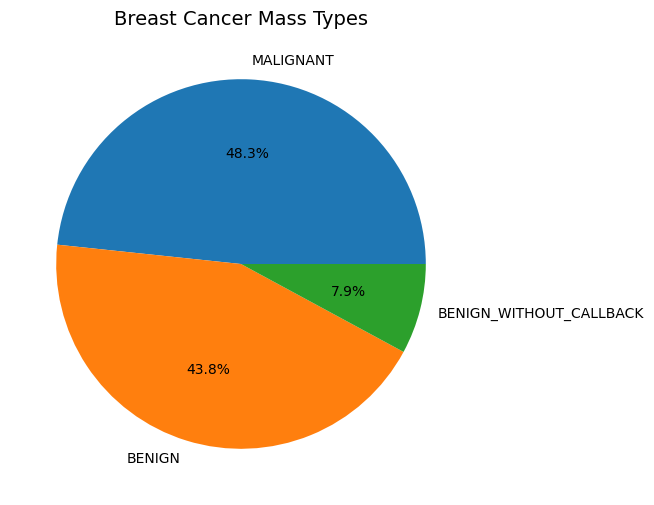

In [125]:
# pathology distributions
value = mass_train['pathology'].value_counts()
plt.figure(figsize=(8,6))

plt.pie(value, labels=value.index, autopct='%1.1f%%')
plt.title('Breast Cancer Mass Types', fontsize=14)
#plt.savefig('/kaggle/working/pathology_distributions_red.png')
plt.show()

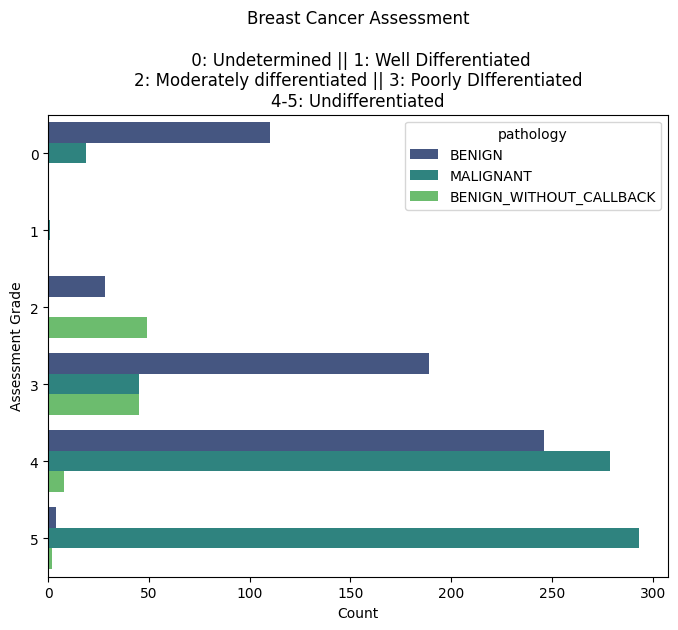

In [126]:
# examine breast assessment types
plt.figure(figsize=(8,6))
sns.countplot(mass_train, y='assessment', hue='pathology', palette='viridis')
plt.title('Breast Cancer Assessment\n\n 0: Undetermined || 1: Well Differentiated\n2: Moderately differentiated || 3: Poorly DIfferentiated\n4-5: Undifferentiated', 
          fontsize=12)
plt.ylabel('Assessment Grade')
plt.xlabel('Count')
#plt.savefig('/kaggle/working/breast_assessment_red.png')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_13220\67270457.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(mass_train, x='subtlety', palette='viridis')


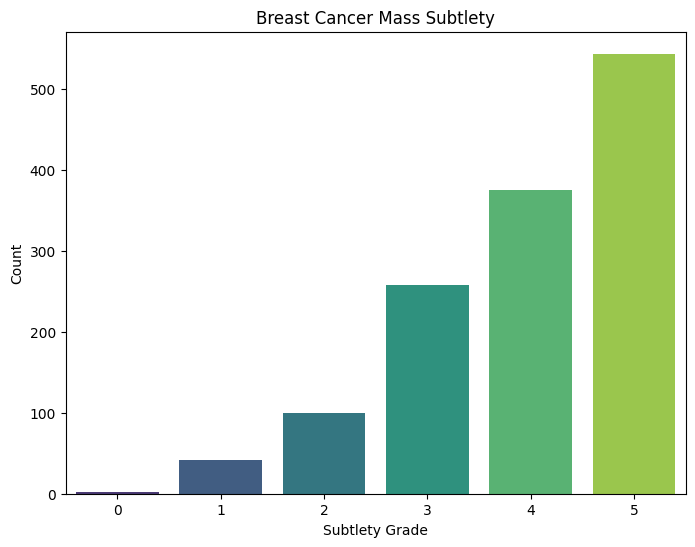

In [127]:
# examine cancer subtlety
plt.figure(figsize=(8,6))
sns.countplot(mass_train, x='subtlety', palette='viridis')
plt.title('Breast Cancer Mass Subtlety', fontsize=12)
plt.xlabel('Subtlety Grade')
plt.ylabel('Count')
#plt.savefig('/kaggle/working/cancer_subtlety_red.png')
plt.show()

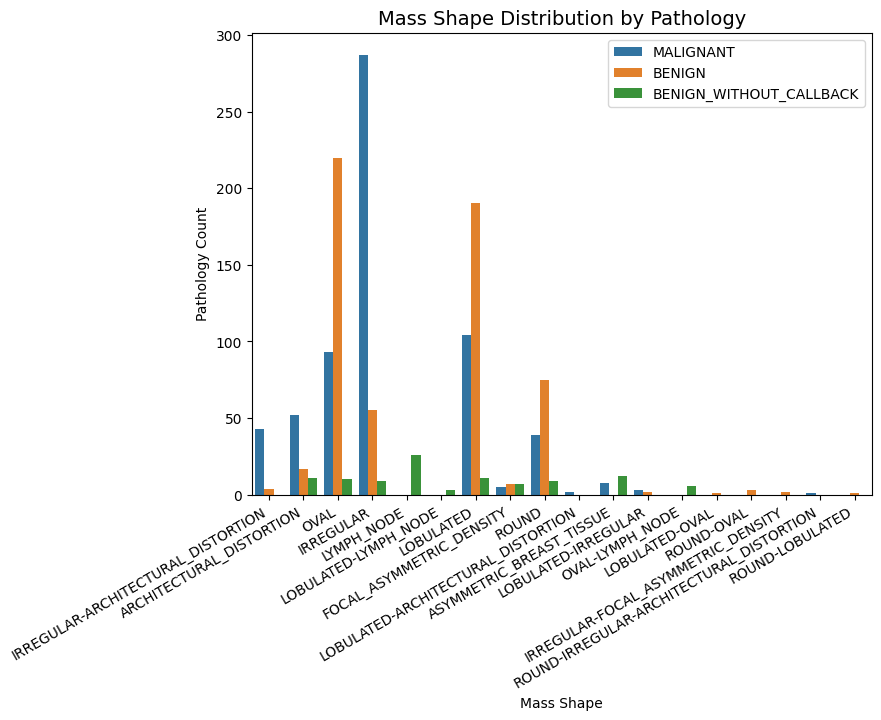

In [128]:
# view breast mass shape distribution against pathology
plt.figure(figsize=(8,6))

sns.countplot(mass_train, x='mass_shape', hue='pathology')
plt.title('Mass Shape Distribution by Pathology', fontsize=14)
plt.xlabel('Mass Shape')
plt.xticks(rotation=30, ha='right')
plt.ylabel('Pathology Count')
plt.legend()
#plt.savefig('/kaggle/working/mass_pathology_red.png')
plt.show()

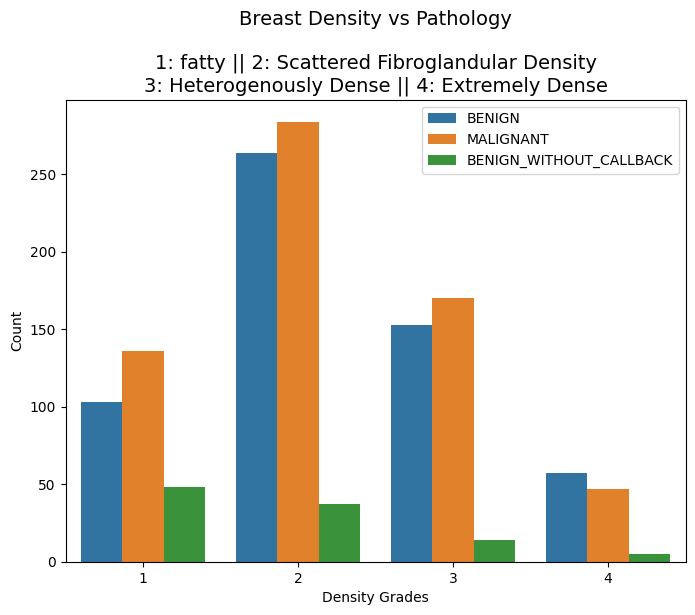

In [129]:
# breast density against pathology
plt.figure(figsize=(8,6))

sns.countplot(mass_train, x='breast_density', hue='pathology')
plt.title('Breast Density vs Pathology\n\n1: fatty || 2: Scattered Fibroglandular Density\n3: Heterogenously Dense || 4: Extremely Dense',
          fontsize=14)
plt.xlabel('Density Grades')
plt.ylabel('Count')
plt.legend()
#plt.savefig('/kaggle/working/density_pathology_red.png')
plt.show()

Full Mammograms:



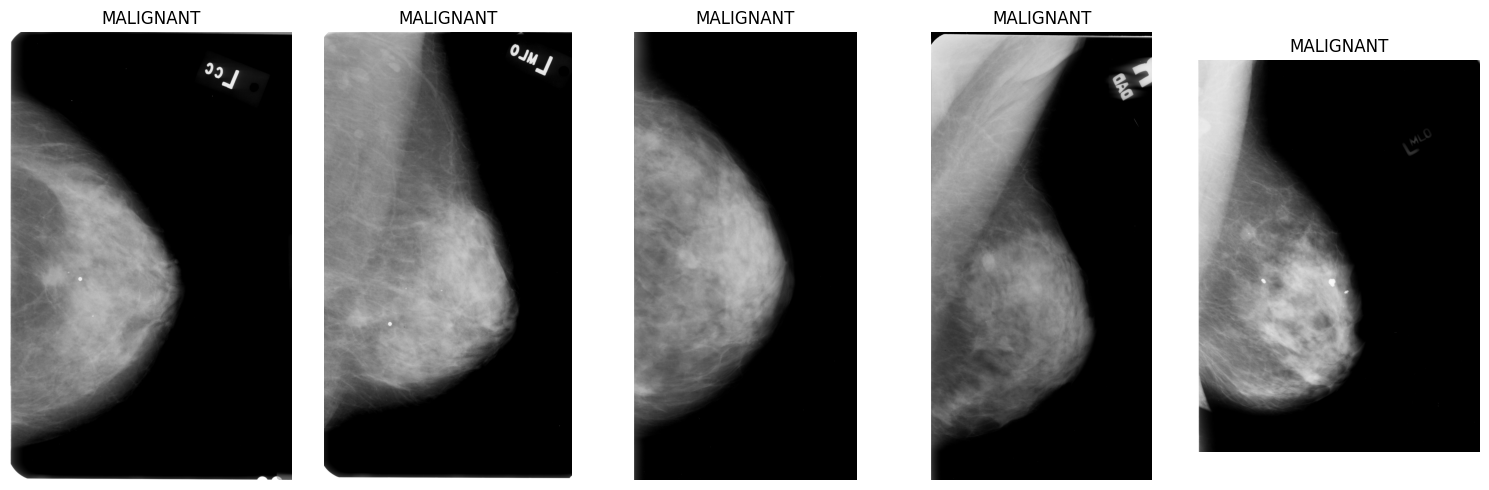

Cropped Mammograms:



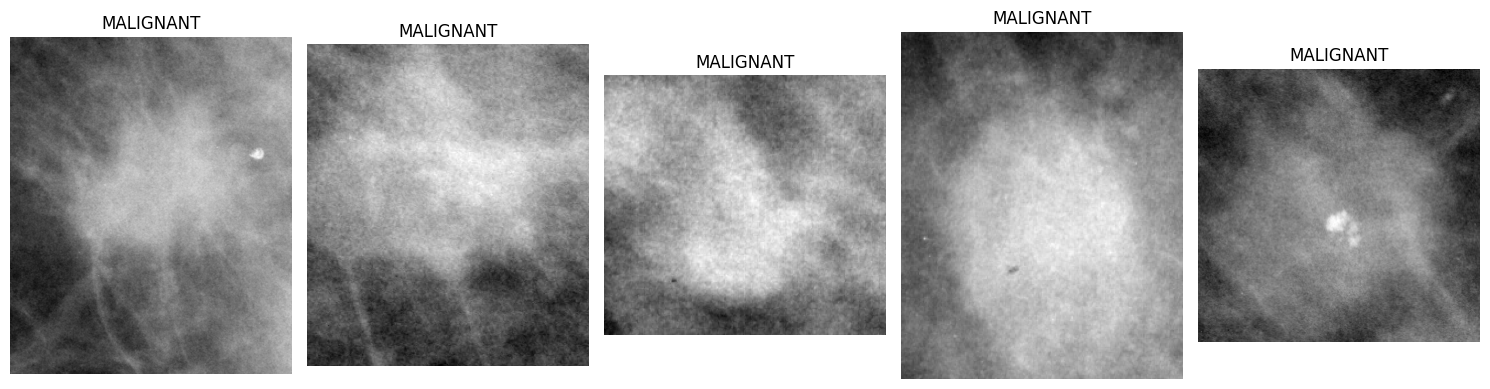

ROI Masks:



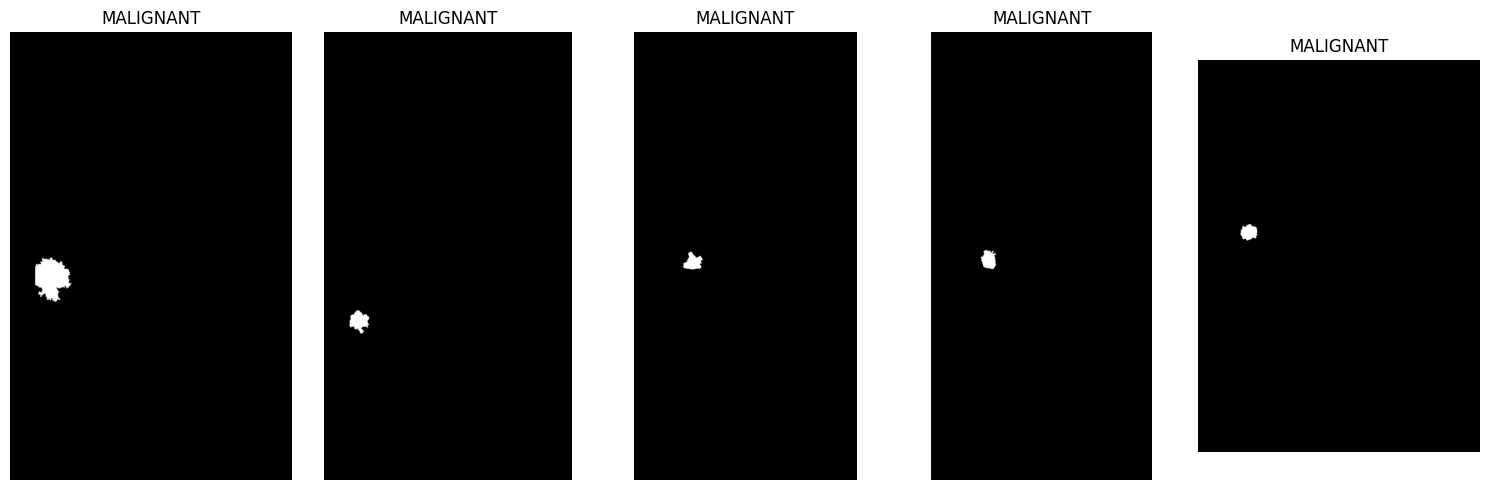

In [130]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def display_images(column, number):
    """displays images in dataset"""
    # Lọc trước những ảnh MALIGNANT
    malignant_rows = mass_train[mass_train['pathology'] == "MALIGNANT"].head(number)
    
    # Tạo figure
    rows = 1
    cols = len(malignant_rows)
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5))
    
    # Nếu chỉ có 1 ảnh thì axes không phải mảng
    if cols == 1:
        axes = [axes]
    
    # Loop qua từng ảnh MALIGNANT
    for ax, (_, row) in zip(axes, malignant_rows.iterrows()):
        image_path = row[column]
        image = mpimg.imread(image_path)
        ax.imshow(image, cmap='gray')
        ax.set_title(f"{row['pathology']}")
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

print('Full Mammograms:\n')
display_images('image_file_path', 5)

print('Cropped Mammograms:\n')
display_images('cropped_image_file_path', 5)

print('ROI Masks:\n')
display_images('ROI_mask_file_path', 5)


# Preprocessing of Images

[[[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [0.5254902  0.5254902  0.5254902 ]
  [0.54901961 0.54901961 0.54901961]
  [0.54509804 0.54509804 0.54509804]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [0.07843137 0.07843137 0.07843137]
  [0.09411765 0.09411765 0.09411765]
  [0.10196078 0.10196078 0.10196078]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 ...

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [0.19215686 0.19215686 0.19215686]
  [0.18823529 0.18823529 0.18823529]
  [0.18823529 0.18823529 0.18823529]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]


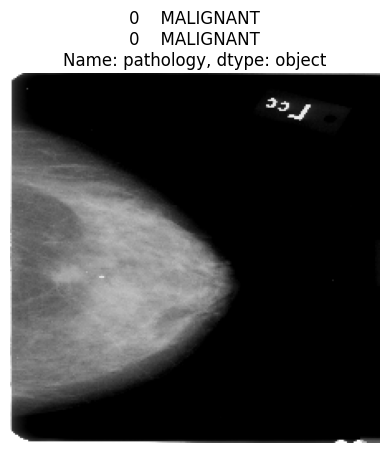

C:\Users\Admin\AppData\Local\Temp\ipykernel_13220\1154219547.py:41: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  full_mass['labels'] = full_mass['pathology'].replace(class_mapper)


In [131]:
import tensorflow as tf
import cv2
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

def image_processor(image_path, target_size):
    """Preprocess images for CNN model"""
    absolute_image_path = os.path.abspath(image_path)
    image = cv2.imread(absolute_image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (target_size[1], target_size[0]))
    image_array = image / 255.0
    return image_array

# Merge datasets
full_mass = pd.concat([mass_train, mass_test], axis=0)

# Define the target size
target_size = (224, 224, 3)

# Apply preprocessor to train data
full_mass['processed_images'] = full_mass['image_file_path'].apply(lambda x: image_processor(x, target_size))

# Create a binary mapper
class_mapper = {'MALIGNANT': 1, 'BENIGN': 0, 'BENIGN_WITHOUT_CALLBACK': 0} 

# Convert the processed_images column to an array
X_resized = np.array(full_mass['processed_images'].tolist())

# In mảng ảnh đầu tiên
print(X_resized[0])
print("Shape:", X_resized[0].shape)

# Vẽ ảnh đầu tiên
plt.imshow(X_resized[0])
plt.title(full_mass['pathology'][0])
plt.axis('off')
plt.show()

# Apply class mapper to pathology column
full_mass['labels'] = full_mass['pathology'].replace(class_mapper)

# Check the number of classes
num_classes = len(full_mass['labels'].unique())

# Split data into train, test, and validation sets (70, 20, 10)
X_train, X_temp, y_train, y_temp = train_test_split(X_resized, full_mass['labels'].values, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

# Convert integer labels to one-hot encoded labels
# y_train = to_categorical(y_train, num_classes)
# y_test = to_categorical(y_test, num_classes)
# y_val = to_categorical(y_val, num_classes)

In [132]:
import numpy as np

def gwo_feature_selection_cnn(X, y, cnn_model_builder, num_wolves=8, max_iter=10, feature_ratio=0.5):
    """
    GWO cho chọn feature tối ưu cho CNN.
    X: feature vector (n_samples, n_features)
    y: label
    cnn_model_builder: hàm trả về model CNN (input_shape, num_classes) -> model
    feature_ratio: tỉ lệ feature muốn giữ lại (ví dụ 0.5 là giữ 50%)
    """
    n_features = X.shape[1]
    n_selected = int(n_features * feature_ratio)
    wolves = np.zeros((num_wolves, n_features), dtype=int)
    for i in range(num_wolves):
        wolves[i, np.random.choice(n_features, n_selected, replace=False)] = 1

    alpha, beta, delta = np.zeros(n_features), np.zeros(n_features), np.zeros(n_features)
    alpha_score, beta_score, delta_score = -np.inf, -np.inf, -np.inf

    def fitness(solution):
        idx = np.where(solution == 1)[0]
        if len(idx) == 0:
            return 0
        X_sel = X[:, idx]
        # Build & train model nhỏ (ví dụ 3 epochs, early stop)
        model = cnn_model_builder((X_sel.shape[1],), len(np.unique(y)))
        model.fit(X_sel, y, epochs=3, batch_size=32, verbose=0)
        acc = model.evaluate(X_sel, y, verbose=0)[1]
        return acc

    for it in range(max_iter):
        for i in range(num_wolves):
            score = fitness(wolves[i])
            if score > alpha_score:
                alpha_score, alpha = score, wolves[i].copy()
            elif score > beta_score:
                beta_score, beta = score, wolves[i].copy()
            elif score > delta_score:
                delta_score, delta = score, wolves[i].copy()
        a = 2 - it * (2 / max_iter)
        for i in range(num_wolves):
            for j in range(n_features):
                r1, r2 = np.random.rand(2)
                A = 2 * a * r1 - a
                C = 2 * r2
                D_alpha = abs(C * alpha[j] - wolves[i, j])
                X1 = alpha[j] - A * D_alpha
                wolves[i, j] = 1 if X1 >= 0.5 else 0
        print(f"GWO iter {it+1}/{max_iter}, best acc: {alpha_score:.4f}")
    return np.where(alpha == 1)[0], alpha_score

# --- Ví dụ sử dụng ---
# Giả sử bạn đã có feature vector từ CNN (ví dụ: output của Flatten layer)
# X_feat = model.predict(X_train)  # (n_samples, n_features)
# idx_selected, best_acc = gwo_feature_selection_cnn(X_feat, y_train, cnn_model_builder)
# X_feat_selected = X_feat[:, idx_selected]

# CNN Architecture

In [133]:
# Import necessary TensorFlow libraries
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import plot_model

# Augment data
train_datagen = ImageDataGenerator(rotation_range=40, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True, 
                                   fill_mode='nearest'
                                  )

# apply augmentation to training data
train_data_augmented = train_datagen.flow(X_train, y_train, batch_size=16)

# instantiate CNN model
model = Sequential()

# add layers
model.add(Conv2D(16, (3, 3), activation='relu', 
                 input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten()) # flatten feature maps
model.add(Dense(64, activation='relu')) # add fully connected layers
model.add(Dense(units= 1, activation='sigmoid')) # output layer

# compile model
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

# train model
history = model.fit(train_data_augmented, 
                    epochs=20, 
                    validation_data=(X_val, y_val), 
                   )

c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 12s 133ms/step - accuracy: 0.5332 - loss: 0.6934 - val_accuracy: 0.5176 - val_loss: 0.6922
Epoch 2/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step - accuracy: 0.5479 - loss: 0.6874 - val_accuracy: 0.5118 - val_loss: 0.6899
Epoch 3/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - accuracy: 0.5347 - loss: 0.6894 - val_accuracy: 0.5176 - val_loss: 0.6917
Epoch 4/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - accuracy: 0.5509 - loss: 0.6888 - val_accuracy: 0.5176 - val_loss: 0.6902
Epoch 5/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - accuracy: 0.5730 - loss: 0.6827 - val_accuracy: 0.5471 - val_loss: 0.6962
Epoch 6/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - accuracy: 0.5406 - loss: 0.6863 - val_accuracy: 0.5059 - val_loss: 0.6931
Epoch 7/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - accuracy: 0.5553 - loss: 0.6796 - val_accuracy: 0.5824 - val_loss: 0.6768
Epoch 8/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - accuracy: 0.5730 - loss: 0.6774 - val_accuracy: 0.5824 -

In [134]:
# model summary
model.summary()

Model: "sequential_172"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 111, 111, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 109, 109, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 52, 52, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_347 (Dense)               │ (None, 64)             │     1,179,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_348 (Dense)               │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,831,653 (14.62 MB)

 Trainable params: 1,277,217 (4.87 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,554,436 (9.74 MB)

# Evaluation

In [167]:
model.evaluate(X_test, y_test)
model.save('breast_cancer_cnn_model.h5')

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5235 - loss: 0.6723


In [136]:
# ...existing code...
from keras.models import Model

# Lấy input từ layer đầu tiên thay vì model.input
input_tensor = model.layers[0].input
flatten_layer = model.get_layer(index=-4)
feature_extractor = Model(inputs=input_tensor, outputs=flatten_layer.output)

X_train_feat = feature_extractor.predict(X_train)
X_val_feat = feature_extractor.predict(X_val)
X_test_feat = feature_extractor.predict(X_test)
# ...existing code...

43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [141]:
flatten_layer = model.get_layer('flatten_2')
feature_extractor = Model(inputs=model.layers[0].input, outputs=flatten_layer.output)

X_train_feat = feature_extractor.predict(X_train)
X_val_feat = feature_extractor.predict(X_val)
X_test_feat = feature_extractor.predict(X_test)

# Đảm bảo là 2D
X_train_feat = X_train_feat.reshape(X_train_feat.shape[0], -1)
X_val_feat = X_val_feat.reshape(X_val_feat.shape[0], -1)
X_test_feat = X_test_feat.reshape(X_test_feat.shape[0], -1)

43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [151]:
def cnn_model_builder(input_shape, num_classes=1):
    from keras.models import Sequential
    from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, InputLayer, Dropout

    model = Sequential()
    model.add(InputLayer(input_shape=input_shape))
    model.add(Dense(64, activation='relu'))  # fully connected layer
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))  # output layer cho nhị phân

    model.compile(
        loss='binary_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )
    return model


# Chạy GWO
idx_selected, best_acc = gwo_feature_selection_cnn(X_train_feat, y_train, cnn_model_builder, num_wolves=8, max_iter=10, feature_ratio=0.5)
print("Feature index được chọn:", idx_selected)

GWO iter 1/10, best acc: 0.6586
GWO iter 2/10, best acc: 0.6704
GWO iter 3/10, best acc: 0.6704
GWO iter 4/10, best acc: 0.6704
GWO iter 5/10, best acc: 0.6704
GWO iter 6/10, best acc: 0.6704
GWO iter 7/10, best acc: 0.6704
GWO iter 8/10, best acc: 0.6704
GWO iter 9/10, best acc: 0.6814
GWO iter 10/10, best acc: 0.6814
Feature index được chọn: [    0     1     2 ... 18427 18428 18429]


In [152]:
# Lấy feature đã chọn
X_train_gwo = X_train_feat[:, idx_selected]
X_val_gwo = X_val_feat[:, idx_selected]
X_test_gwo = X_test_feat[:, idx_selected]

# Train lại model nhỏ (hoặc dùng classifier khác như SVM, RF)
model_gwo = cnn_model_builder((X_train_gwo.shape[1],), 1)
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# Khi fit:
history_gwo = model_gwo.fit(X_train_gwo, y_train, epochs=50, validation_data=(X_val_gwo, y_val), callbacks=[early_stop])

Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5553 - loss: 0.6857 - val_accuracy: 0.5706 - val_loss: 0.6659
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5914 - loss: 0.6601 - val_accuracy: 0.6176 - val_loss: 0.6487
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6268 - loss: 0.6382 - val_accuracy: 0.6353 - val_loss: 0.6376
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6379 - loss: 0.6181 - val_accuracy: 0.6059 - val_loss: 0.6412
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6615 - loss: 0.6123 - val_accuracy: 0.6353 - val_loss: 0.6433
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6696 - loss: 0.5980 - val_accuracy: 0.6353 - val_loss: 0.6340
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6674 - loss: 0.5912 - val_accuracy: 0.6412 - val_loss: 0.6363
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6836 - loss: 0.5833 - val_accuracy: 0.6529 - val_loss:

In [155]:
test_loss, test_acc = model_gwo.evaluate(X_test_gwo, y_test)
print("Test accuracy (GWO feature):", test_acc)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6235 - loss: 0.6359 
Test accuracy (GWO feature): 0.6235294342041016


In [ ]:
# Lưu model sau khi train
model_gwo.save('model_gwo_selected_feature.h5')

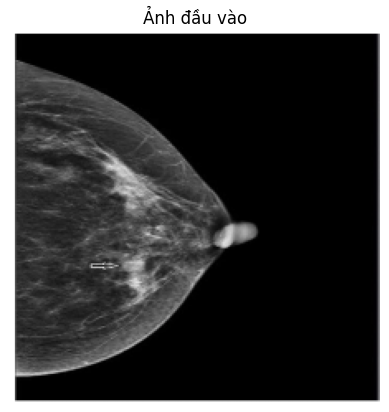

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Xác suất dự đoán: 0.8927588
Dự đoán label: 1 | MALIGNANT


In [187]:
# ...existing code...

import cv2
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt

def preprocess_image(image_path, target_size=(224, 224, 3)):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (target_size[1], target_size[0]))
    image = image / 255.0
    return image

# Đường dẫn ảnh cần dự đoán
img_path = r'c:\Users\Admin\Downloads\screenshot_1758809324.png'  # <-- thay bằng đường dẫn ảnh thực tế

# Tiền xử lý ảnh
img = preprocess_image(img_path)
plt.imshow(img)
plt.title("Ảnh đầu vào")
plt.axis('off')
plt.show()

# Chuyển ảnh thành vector đặc trưng (feature vector)
img_feat = feature_extractor.predict(img.reshape(1, *img.shape))
img_feat_gwo = img_feat[:, idx_selected]

# Dự đoán

# ...existing code...
# loaded_model = load_model('breast_cancer_cnn_model.h5')
# pred_prob = loaded_model.predict(img.reshape(1, *img.shape))
# ...existing code...
loaded_model = load_model('model_gwo_selected_feature.h5')
pred_prob = loaded_model.predict(img_feat_gwo)
pred_label = int(pred_prob[0, 0] > 0.5)
print("Xác suất dự đoán:", pred_prob[0, 0])
print("Dự đoán label:", pred_label, "|", "MALIGNANT" if pred_label == 1 else "BENIGN")
# ...existing code...

# Classification Report

In [188]:
from sklearn.metrics import classification_report, confusion_matrix

# create labels for confusion matrix
cm_labels = ['MALIGNANT', 'BENIGN']

# obtain predictions
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

# convert predicted probabilities to class predictions
y_pred_classes_test = np.argmax(y_pred_test, axis=1)
y_pred_classes_train = np.argmax(y_pred_train, axis=1)

# Assuming y_test and y_val are in binary format (0 or 1)
y_true_classes_test = np.argmax(y_test, axis=1)
y_true_classes_train = np.argmax(y_train, axis=1)

# generate classification reports for test and val sets
test_report = classification_report(y_true_classes_test, y_pred_classes_test, target_names=cm_labels)
train_report = classification_report(y_true_classes_train, y_pred_classes_train, target_names=cm_labels)

# generate confusion matrices for test and validation sets
test_cm = confusion_matrix(y_true_classes_test, y_pred_classes_test)
train_cm = confusion_matrix(y_true_classes_train, y_pred_classes_train)

# create function to print confusion matrix
def plot_confusion_matrix(cm, labels, title):
    """plots a normalized confusion matrix as a heatmap."""
    # Calculate row sums
    row_sums = cm.sum(axis=1, keepdims=True)
    # Normalize confusion matrix
    normalized_cm = cm / row_sums

    plt.figure(figsize=(8, 6))
    sns.heatmap(normalized_cm, annot=True, fmt='.2%', cmap='Blues', cbar=False,
                xticklabels=labels, yticklabels=labels)
    plt.title(title, fontsize=14)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# print Train and Test reports and matrices
print(f"Train Set Classification report:\n {train_report}\n")
plot_confusion_matrix(train_cm, cm_labels, 'Train Set Confusion Matrix')

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


AxisError: axis 1 is out of bounds for array of dimension 1

Test Set Classification report:
               precision    recall  f1-score   support

   MALIGNANT       0.51      1.00      0.68       175
      BENIGN       0.00      0.00      0.00       166

    accuracy                           0.51       341
   macro avg       0.26      0.50      0.34       341
weighted avg       0.26      0.51      0.35       341




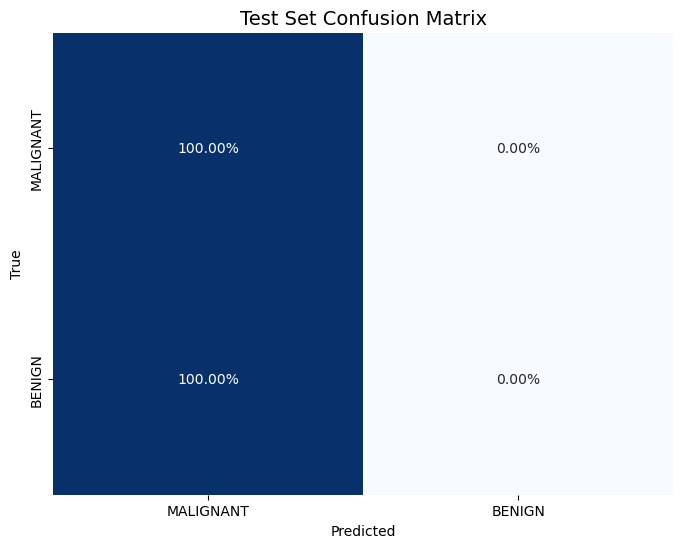

In [ ]:
print(f"Test Set Classification report:\n {test_report}\n")
plot_confusion_matrix(test_cm, cm_labels, 'Test Set Confusion Matrix')

# ROC_AUC Curves

In [189]:
from sklearn.metrics import roc_curve, auc

# Use the trained model to predict probabilities for the test set
y_pred_prob = model.predict(X_test)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test[:, 1], y_pred_prob[:, 1])
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Print the AUC score
print(f'AUC: {roc_auc:.2f}')

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

# Visualizing Loss vs Epoch/Accuracy vs Epoch 

In [ ]:
history_dict = history.history

In [190]:
# plot training loss vs validation loss
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'b', label='Training Loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation Loss')
plt.title('Training and Validation Loss', fontsize=12)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
#history_df = pd.DataFrame(history.history)
#history_df[['loss', 'val_loss']].plot()

#history_df = pd.DataFrame(history.history)
#history_df[['accuracy', 'val_accuracy']].plot()

NameError: name 'history_dict' is not defined

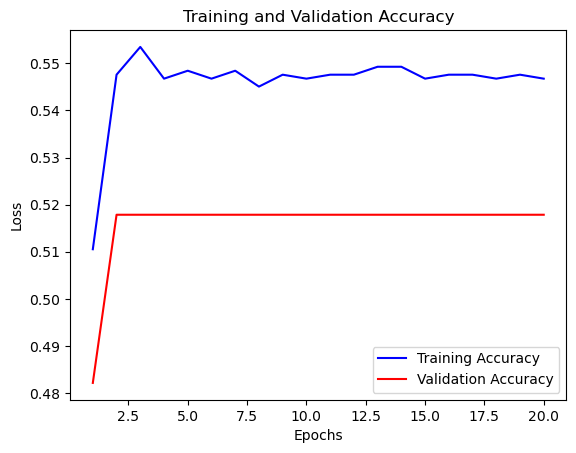

In [ ]:
# plot training vs validation accuracy
val_acc_values = history_dict['val_accuracy']
acc = history_dict['accuracy']

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy', fontsize=12)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Transfer Learning-Hyperparameter Tuning

In [ ]:
# model summary
vgg_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_2 (Dense)             (None, 512)               12845568  
                                                                 
 dense_3 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 32,870,978
Trainable params: 12,846,594
Non-trainable params: 20,024,384
_________________________________________________________________


# Classification Report: Transfer Learning

In [ ]:
# classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

# create labels for confusion matrix
cm_labels = ['MALIGNANT', 'BENIGN']

#obtain predictions
y_pred_train_vgg = vgg_model.predict(X_train)
y_pred_test_vgg = vgg_model.predict(X_test)

# convert predicted probabilities to class predictions
y_pred_classes_test_vgg = np.argmax(y_pred_test_vgg, axis=1)
y_pred_classes_train_vgg = np.argmax(y_pred_train_vgg, axis=1)

# get true classes
y_true_classes_train_vgg = np.argmax(y_train, axis=1)
y_true_classes_test_vgg = np.argmax(y_test, axis=1)

# create function to print confusion matrix
def plot_confusion_matrix(cm, labels, title):
    """plots a normalized confusion matrix as a heatmap."""
    # Calculate row sums
    row_sums = cm.sum(axis=1, keepdims=True)
    # Normalize confusion matrix
    normalized_cm = cm / row_sums

    plt.figure(figsize=(8, 6))
    sns.heatmap(normalized_cm, annot=True, fmt='.2%', cmap='Blues', cbar=False,
                xticklabels=labels, yticklabels=labels)
    plt.title(title, fontsize=14)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# generate classification report
test_report_vgg = classification_report(y_true_classes_test_vgg, y_pred_classes_test_vgg, target_names=cm_labels)
train_report_vgg = classification_report(y_true_classes_train_vgg, y_pred_classes_train_vgg, target_names=cm_labels)

# generate confusion matrix
test_cm_vgg = confusion_matrix(y_true_classes_test_vgg, y_pred_classes_test_vgg)
train_cm_vgg = confusion_matrix(y_true_classes_train_vgg, y_pred_classes_train_vgg)

In [ ]:
print(f'Train Set Classifcation report:\n {train_report_vgg}\n')
plot_confusion_matrix(train_cm_vgg, cm_labels, 'Train Set Confusion Matrix: VGG19')

In [ ]:
print(f"Test Set Classification report:\n {test_report_vgg}\n")
plot_confusion_matrix(test_cm_vgg, cm_labels, 'Test Set Confusion Matrix: VGG19')

# ROC-AUC Curves: Transfer Learning

In [ ]:
# ROC-AUC Curves
from sklearn.metrics import roc_curve, auc

# Use the trained model to predict probabilities for the test set
y_pred_prob = vgg_model.predict(X_test)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test[:, 1], y_pred_prob[:, 1])
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic-Area Under Curve (ROC-AUC)')
plt.legend(loc='lower right')
plt.show()

# Print the AUC score
print(f'AUC: {roc_auc:.2f}')

# Epochs-Loss-Accuracy Visualization: Transfer Learning

In [ ]:
pre_train_dict = history_3.history

In [ ]:
# plot training loss vs validation loss
loss_values = pre_train_dict['loss']
val_loss_values = pre_train_dict['val_loss']
acc = pre_train_dict['accuracy']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'b', label='Training Loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation Loss')
plt.title('Training and Validation Loss', fontsize=12)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# plot training vs validation accuracy
val_acc_values = pre_train_dict['val_accuracy']

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy', fontsize=12)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Human Readable Predictions

In [ ]:
predictions = vgg_model.predict(X_test)

In [ ]:
import random

# reverse class mapping
reverse_mapper = {v:k for k, v in class_mapper.items()}

# map predictions to class_names
predicted_class_indices = np.argmax(predictions, axis=1)
predicted_class_names = [reverse_mapper[i] for i in predicted_class_indices]

ground_truth_class_indices = np.argmax(y_test, axis=1)
ground_truth_class_names = [reverse_mapper[i] for i in ground_truth_class_indices]

In [ ]:
# display predicted class_names
num_image_visualize = min(5, len(X_test))

# create random indices to select images
random_indices = random.sample(range(len(X_test)), num_image_visualize)

# create subplots for images
fig, ax = plt.subplots(1, num_image_visualize, figsize=(15, 5))

for i, idx in enumerate(random_indices):
    ax[i].imshow(X_test[idx])
    ax[i].set_title(f'Predicted: {predicted_class_names[idx]}', fontsize=10, color='red')
    ax[i].text(0.5, -0.1, f'Truth: {ground_truth_class_names[idx]}', fontsize=10, ha='center', va='center', 
              transform=ax[i].transAxes, color='blue')
    ax[i].axis('off')

plt.tight_layout()
plt.show()

# Save Model

In [ ]:
vgg_model.save('transfer_learning-1_model.h5')